In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

seed = 42
import random


from collections import defaultdict

import sys

from tqdm import tqdm

sys.path.append("/home/jupyter/work/resources/DiplomDimReduction/")
import importlib

import config

importlib.reload(config)
import utils
from config import config_dict

importlib.reload(utils)

from utils import load_sk_model, load_vectors

In [2]:
corpus_prefix = config_dict["marco_prefix"]
split_suffix = config_dict["train_suffix"]

In [3]:
method_prefix = config_dict["dpr_prefix"]
# method_prefix = config_dict["ance_prefix"]
# method_prefix = config_dict['tas-b_prefix']
# method_prefix = config_dict['s-bert_prefix']
# method_prefix = config_dict["late interaction prefix"]

corpus_vector_path = config_dict["corpus_vector_template"].format(
    corpus_prefix, method_prefix, split_suffix
)

sk_model_path_template = config_dict["reduction_sk_model_template"]

In [4]:
%%time
corpus_vectors = load_vectors(corpus_vector_path)
corpus_vectors.shape

CPU times: user 1.7 s, sys: 494 ms, total: 2.2 s
Wall time: 3.6 s


(99441, 768)

In [13]:
model_path = sk_model_path_template.format(
        corpus_prefix, method_prefix, "PCA", 64
    )

In [14]:
pca = load_sk_model(model_path)

In [15]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

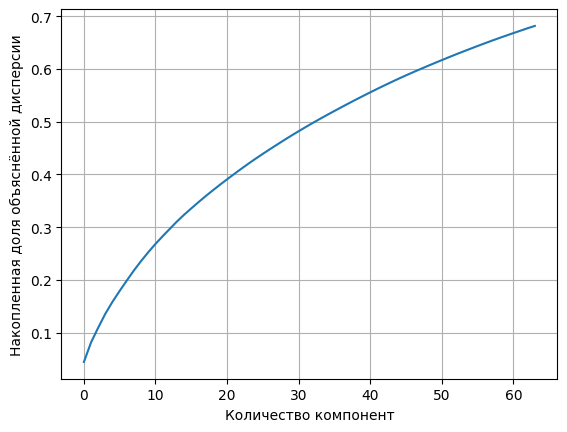

In [16]:
plt.plot(explained_variance)
plt.xlabel("Количество компонент")
plt.ylabel("Накопленная доля объяснённой дисперсии")
plt.grid()
plt.show()